In [22]:
# Pan Card Tampering Detection
print('''
Proj: Pan Card Tampering Detection
Author: Sourav
Course: 60 ML DS Proj - Udemy.
''')


Proj: Pan Card Tampering Detection
Author: Sourav
Course: 60 ML DS Proj - Udemy.



In [23]:
# all preinstalled shits for ML
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests


# system commads for file structures
!mkdir -p pan_card_detection/img
data_path = "./pan_card_detection/img"

In [24]:
# setup data
original_pan_image = Image.open(requests.get(
    "https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg"
    ,stream=True).raw)
print("origial_pan_image: ", original_pan_image)
print("origial_pan_image size: ", original_pan_image.size)
print("origial_pan_image format: ", original_pan_image.format)


fake_pan_image = Image.open(requests.get(
    "https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png"
    ,stream=True).raw)
print("fake_pan_image: ", fake_pan_image)
print("fake_pan_image size: ", fake_pan_image.size)
print("fake_pan_image format: ", fake_pan_image.format)


# resize image for same size
resize_diamentions = (260,160)

original_pan_image = original_pan_image.resize(resize_diamentions)
fake_pan_image = fake_pan_image.resize(resize_diamentions)

original_pan_image.save(data_path + "/og.png")
fake_pan_image.save(data_path + "/fake.png")



origial_pan_image:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x800 at 0x7F99D2585790>
origial_pan_image size:  (1200, 800)
origial_pan_image format:  JPEG
fake_pan_image:  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=282x179 at 0x7F99D25172D0>
fake_pan_image size:  (282, 179)
fake_pan_image format:  PNG


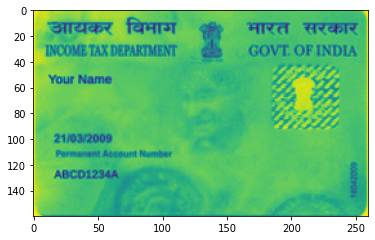

In [30]:
# image comparison
original_resized_img = cv2.imread(data_path + "/og.png")
fake_resized_img = cv2.imread(data_path + "/fake.png")

# converting to grayscale as, colored images are complex to understand so this is must in order to find similarity.
# as colored images has 3 channels RGB, where as grayscale images has 1 channel.

original_grayscale_img = cv2.cvtColor(original_resized_img, cv2.COLOR_BGR2GRAY)
fake_grayscale_img = cv2.cvtColor(fake_resized_img, cv2.COLOR_BGR2GRAY)


# checking for gray scale
# import matplotlib.pyplot as plt
# plt.imshow(fake_grayscale_img)
# plt.show()


In [35]:
# now find structural similarity between two
# structural similarity between two images
(similarity_score, structural_diffrence) = structural_similarity(original_grayscale_img, fake_grayscale_img, full=True)
structural_diffrence = (structural_diffrence * 255).astype("uint8")

print("Score: ", similarity_score)
print("Diffrence: ", structural_diffrence)


Score:  0.3171189636268309
Diffrence:  [[219 205 193 ...  88  86  97]
 [216 214 206 ... 120 118 111]
 [218 219 219 ... 149 146 137]
 ...
 [176 198 200 ... 185 184 191]
 [166 192 182 ... 163 169 179]
 [143 181 174 ... 147 152 148]]


In [38]:
# find threshold and countores of the image based on structural_diffrence

threshold_of_structural_diffrence = cv2.threshold(structural_diffrence, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

contours = cv2.findContours(threshold_of_structural_diffrence.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)


print("threshold_of_structural_diffrence: ", threshold_of_structural_diffrence)

print("contours: ", contours)



threshold_of_structural_diffrence:  [[  0   0   0 ... 255 255 255]
 [  0   0   0 ...   0 255 255]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
contours:  [[[255 152]]

 [[254 153]]

 [[254 154]]

 [[255 155]]]


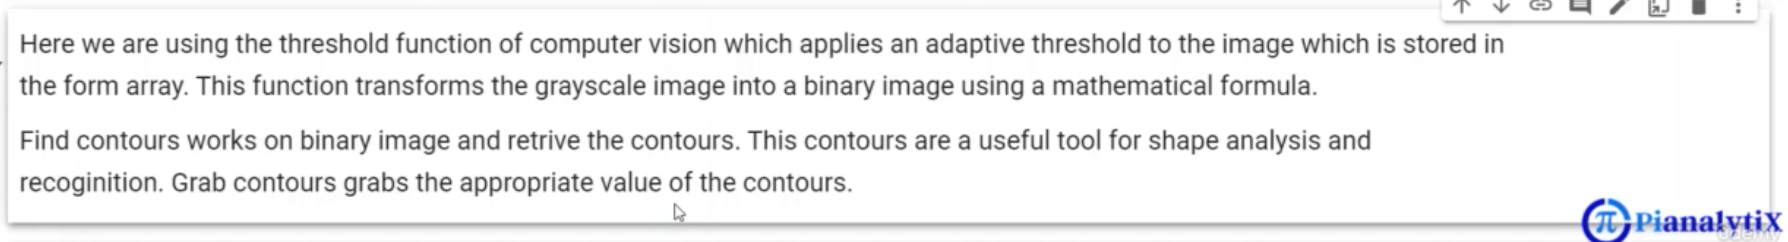

In [39]:
# image diffrence via countors
for contour in contours:
  (x, y, width, height) = cv2.boundingRect(contour)
  cv2.rectangle(original_resized_img, (x,y), (x+width, y+height), (0,0,255), 2)
  cv2.rectangle(fake_resized_img, (x,y), (x+width, y+height), (0,0,255), 2)

original


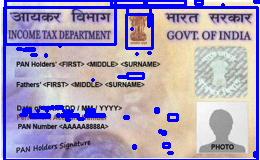

In [43]:
print("original")
Image.fromarray(original_resized_img)




This Countor shit didnt here here, this shit might be useful later.:

fake


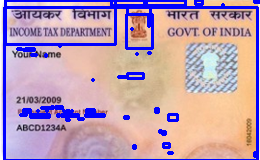

In [44]:
print("fake")
Image.fromarray(fake_resized_img)

Diffrence between images


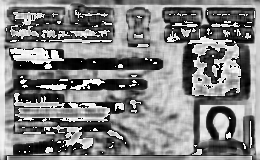

In [45]:
print("Diffrence between images")
Image.fromarray(structural_diffrence)

Threshold of two images


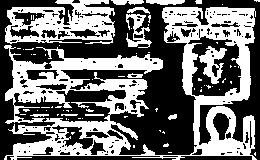

In [46]:
print("Threshold of two images")
Image.fromarray(threshold_of_structural_diffrence)